In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_jacobi
from scipy.misc import derivative
from scipy.integrate import quad
from numpy.linalg import solve, det
from math import exp, sin, log
from copy import copy

In [2]:
def p_n_k(n,k): #многочлен Якоби
    return lambda t: (1-t**2)*eval_jacobi(n,k,k,t)

In [3]:
def p_n_k_first_der(n,k): #первая производная многочлена Якоби
    return lambda t: derivative(p_n_k(n,k),t)

In [4]:
def p_n_k_second_der(n,k): #вторая производная
    return lambda t: derivative(p_n_k_first_der(n,k),t)

In [5]:
def A_i(funs,phi,dphi,ddphi,i): #функции A_i из метода Галеркина
    k,p,q,f = funs
    return lambda x: k(x)*ddphi[i](x)+p(x)*dphi[i](x)+q(x)*phi[i](x)

In [54]:
def galerkin_method(segment,funs,N): #метод Галеркина
    a,b = segment
    k,p,q,f = funs
    phi = [p_n_k(i,1) for i in range(N)]
    dphi = [p_n_k_first_der(i,1) for i in range(N)]
    ddphi = [p_n_k_second_der(i,1) for i in range(N)]
    A = np.array([A_i(funs,phi,dphi,ddphi,i) for i in range(N)])
    C = np.array([quad(lambda t: f(t)*phi[i](t),a,b)[0] for i in range(N)])
    B = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            B[i,j] = quad(lambda t: phi[i](t)*A[j](t),a,b)[0]
    alpha = solve(B,C)
    return lambda t: sum([alpha[i]*phi[i](t) for i in range(N)])

Задачи из методички А.Н. Пакулиной: 

In [55]:
funs = [[lambda x: -(4-x)/(5-2*x),
        lambda x: (1-x)/2,
        lambda x: 0.5*log(x+3),
        lambda x: 1+x/3],
       [lambda x: (x-2)/(x+2),
       lambda x: x,
       lambda x: 1-sin(x),
       lambda x: x**2],
       [lambda x: -(7-x)/(8+3*x),
       lambda x: (1+x/3),
       lambda x: (1-exp(x/2)/2),
       lambda x: 1/2-x/3]]

segment = [[-1,1],[-1,1],[-1,1]]

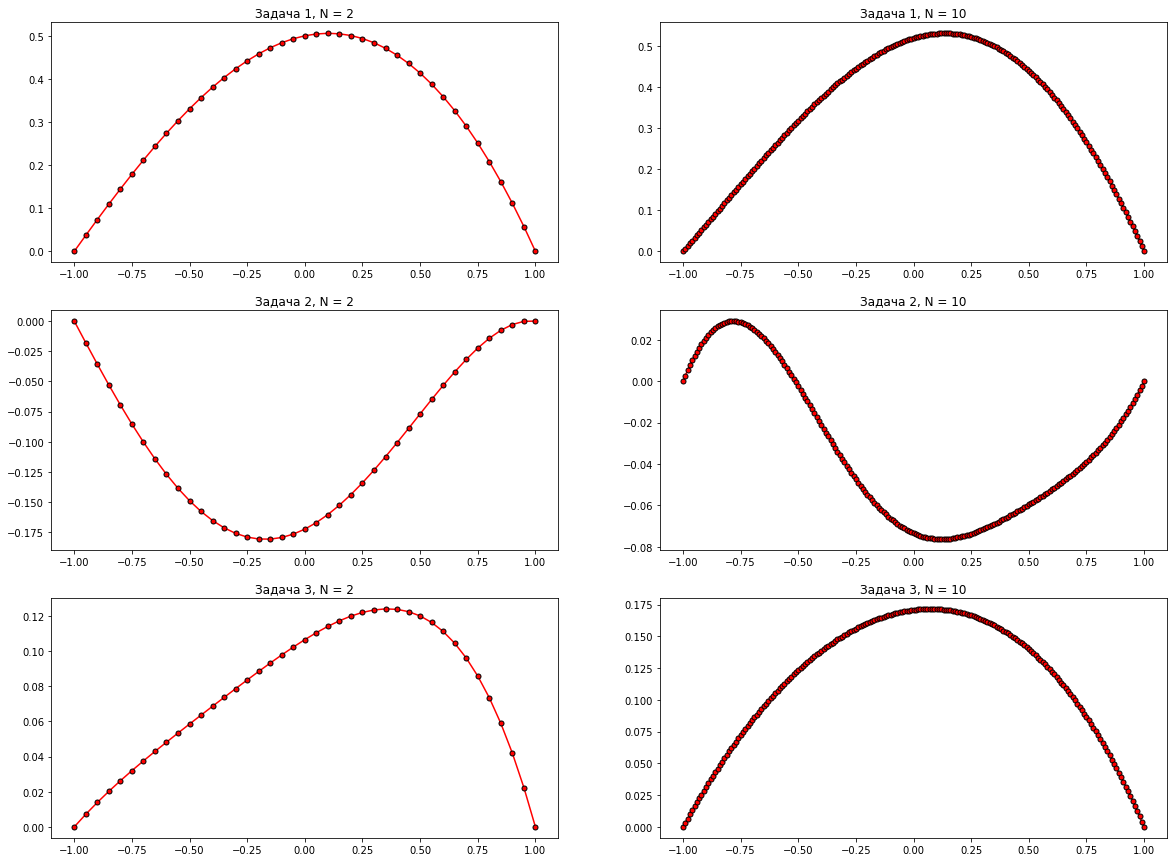

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        if j == 0:
            N, h = 3, 0.05
        else:
            N, h = 11, 0.01
        u = galerkin_method(segment[i],funs[i],N)
        a,b = segment[i]
        n = round((b - a) / h)
        x1 = np.zeros(n + 1)
        y = np.zeros(n + 1)
        for t in range(n + 1):
            x1[t] = a + t* h
            y[t] = u(x1[t])
        axes[i,j].plot(x1, y, marker='.', color='red', mec='black', ms=10)
        axes[i,j].set_title("Задача {}, N = {}".format(i+1,N-1))
plt.savefig("Lab8_graph")